# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

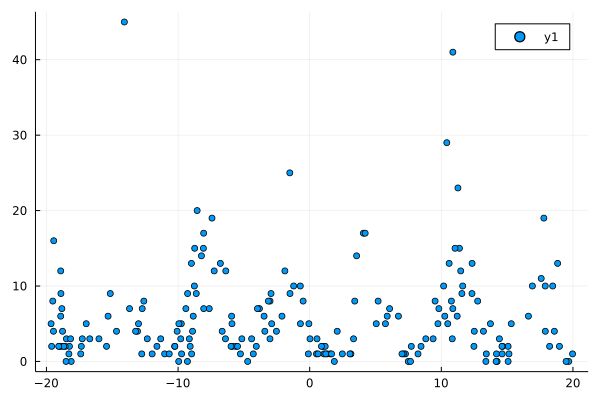

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -535.6413151744421
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.310381 seconds (7.03 M allocations: 447.812 MiB, 1.91% gc time, 96.37% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.3623460591439855, 0.49998455006183773, 0.5836722923315978, 0.1361552186645464, 0.37643577112444176, 0.21301460516204726, 0.6237102508179866, 0.5979438523168362, 0.225317340105573, 0.2076063110337049  …  0.4655647933223473, 0.77215467256066, 0.3422541483730799, 0.2359401416592233, 0.187810874605496, 0.20044569370361945, 0.2488712554142846, 0.5998825954944331, 0.22127390913902353, 0.6477177988989868], θ = [6.92440382701847, 3.428865562782409, 3.403909176677747, 3.494603017129742, 7.412672327546918, 8.468004390690398, 2.9063864058306734, 3.399316691736532, 4.481058193863334, 5.978542288618694  …  8.34972472816741, 2.3827714161799887, 4.951757563875514, 4.9769335014847105, 6.480960985849664, 2.9899955753010192, 3.482046262013641, 3.3986854291739563, 3.485788951283754, 2.8993365322296416]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple(),)

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -732.9663888425323
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.252287 seconds (4.45 M allocations: 312.651 MiB, 5.09% gc time, 97.32% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 12.870176701560966) infered by Analytic Variational Inference , (local_vars = (c = [0.31371085424540396, 0.6909041742735644, 0.7542129416749763, 0.16570525257599228, 0.33337395640017903, 0.15941323089378526, 0.793175009965918, 0.7600972086780959, 0.17510997915531623, 0.3217978850535681  …  0.46515947919641953, 0.92130376065815, 0.4828500340025866, 0.20627085258309769, 0.1499619433085277, 0.30740658088310546, 0.19139469788097735, 0.7703496821279545, 0.16494774000751192, 0.8283207591985219], θ = [7.1870017963949415, 5.047592931918724, 5.101582862883436, 4.383655296987077, 7.669124574800077, 9.178632083399496, 4.647165380134481, 5.105924508453197, 5.168356533304592, 7.085205527151469  …  8.35543744830659, 4.255091253932192, 6.265459949106242, 5.7386289912135435, 7.245218861218732, 4.088379582717086, 4.107624475484485, 5.110948571334037, 4.163348190203306, 4.637677969897226], γ = [5.491694884316474, 8.493603762279099, 8.682303199

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

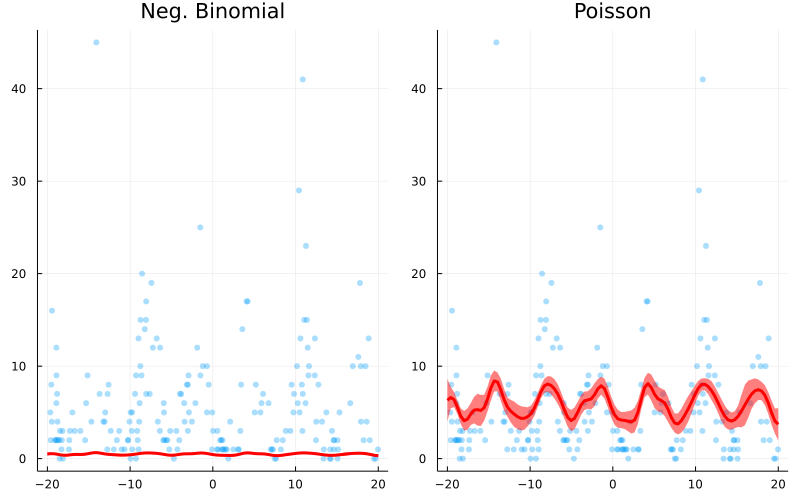

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*